# Text Classification: Name Gender

Here is a partition of the name gender data into training, dev-test, and test data as shown in the lectures:

In [1]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to
[nltk_data]     /Users/gideonsacks/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [2]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name,'male') for name in m] +
         [(name,'female') for name in f])
random.shuffle(names)
train_names = names[1500:]
devtest_names = names[500:1500]
test_names = names[:500]

And here is one of the classifiers given in the lectures.

In [4]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}
train_set2=[(gender_features2(n),g) for (n,g) in train_names]
devtest_set2=[(gender_features2(n),g) for (n,g) in devtest_names]
classifier2=nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2,devtest_set2)

0.77

### Exercise: What are the most informative features?
Use the classifier `most_informative_features` to determine the most informative features. What does this information tell you?

In [5]:
classifier2.show_most_informative_features()


Most Informative Features
                 suffix2 = 'na'           female : male   =    147.8 : 1.0
                 suffix2 = 'la'           female : male   =     65.8 : 1.0
                 suffix1 = 'k'              male : female =     63.0 : 1.0
                 suffix2 = 'rt'             male : female =     43.9 : 1.0
                 suffix2 = 'ta'           female : male   =     40.0 : 1.0
                 suffix2 = 'rd'             male : female =     37.7 : 1.0
                 suffix2 = 'us'             male : female =     36.3 : 1.0
                 suffix1 = 'a'            female : male   =     36.3 : 1.0
                 suffix2 = 'ld'             male : female =     33.9 : 1.0
                 suffix2 = 'ia'           female : male   =     33.8 : 1.0


### Exercise: Using more information
Define a new function `gender_features5` that takes, as features, any suffixes of size 1, 2, 3, 4, and 5. Examine the accuracy results and the most informative features. What can you conclude from this new classifier?

In [6]:
def gender_features5(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'suffix4': word[-4:],
            'suffix5': word[-5:]}
train_set5=[(gender_features5(n),g) for (n,g) in train_names]
devtest_set5=[(gender_features5(n),g) for (n,g) in devtest_names]
classifier5=nltk.NaiveBayesClassifier.train(train_set5)
nltk.classify.accuracy(classifier5,devtest_set5)

0.786

### Exercise: Improve the gender classifier

Can you improve the results of this classifier? This is an open-ended exercise. Choose other features, try to improve the classifier. Use the train set to train the model, and test the results on the dev-test set.

In [44]:
def gender_features7(word):
    return {'prefix1': word[:1],
            'prefix2': word[:2],
            'prefix3': word[:3],
            'prefix4': word[:4],
            'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:]}
           
train_set7=[(gender_features7(n),g) for (n,g) in train_names]
devtest_set7=[(gender_features7(n),g) for (n,g) in devtest_names]
classifier7=nltk.NaiveBayesClassifier.train(train_set7)
nltk.classify.accuracy(classifier7,devtest_set7)

0.854

### Exercise: Test the results on the test set

After you have found the best classifier, test it on the test set (not the dev-test set). Is it still the best classifier?

In [45]:
test_set7=[(gender_features7(n),g) for (n,g) in test_names]
nltk.classify.accuracy(classifier7,test_set7)

0.832

### Exercise: Plot the impact of the training size

The following code plots the classifier accuracy on the training and dev-test set as we increase the training size. Examine the plot and answer the following questions:

1. From what amount of training data you would judge that the system stops over-fitting?
2. From what amount of training data would you say that there is no need to add more training data?

In [56]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10,1000,5)
for n in nsamples:
    classifier2 = nltk.NaiveBayesClassifier.train(train_set2[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2,train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2,devtest_set2))

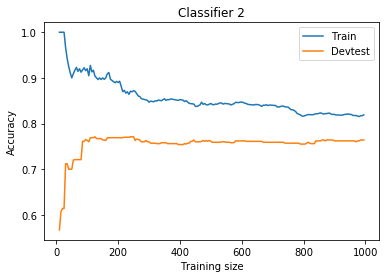

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples,train_accuracy2,label='Train')
plt.plot(nsamples,devtest_accuracy2,label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

In [58]:
train_accuracy7 = []
devtest_accuracy7 = []
nsamples = range(10,5000,5)
for n in nsamples:
    classifier7 = nltk.NaiveBayesClassifier.train(train_set7[:n])
    train_accuracy7.append(nltk.classify.accuracy(classifier7,train_set7[:n]))
    devtest_accuracy7.append(nltk.classify.accuracy(classifier7,devtest_set7))

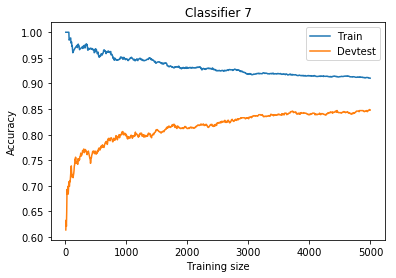

In [59]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples,train_accuracy7,label='Train')
plt.plot(nsamples,devtest_accuracy7,label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 7')
plt.legend()

### Exercise: Repeat the analysis with your classifier

Repeat the analysis, now using your own classifier. Try to answer the same questions as above.


1. From what amount of training data you would judge that the system stops overfitting?
2. From what amount of training data would you say that there is no need to add more training data?


# K-Nearest Neighbours Classification

Below is some code that trains [sklearn's K-nearest neighbour classifier](http://scikit-learn.org/stable/modules/neighbors.html) for the task of classifying the name gender. The feature extraction creates a vector representing the last character and second last character of the word.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
def gender_features_knn(word):
    "Return a list with the ASCII of the last and second last character"
    return [ord(word[-2]),ord(word[-1])]
train_set_knn=[(gender_features_knn(n),g) for (n,g) in train_names]
devtest_set_knn=[(gender_features_knn(n),g) for (n,g) in devtest_names]
train_X, train_y = zip(*train_set_knn)
knn_classifier = KNeighborsClassifier(n_neighbors=3) # We are using K = 3
knn_classifier.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

You can also use `sklearn` to determine the accuracy of the classifier:

In [61]:
from sklearn.metrics import accuracy_score
devtest_X, devtest_y = zip(*devtest_set_knn)
devtest_predictions = knn_classifier.predict(devtest_X)
accuracy_score(devtest_y,devtest_predictions)

0.77900000000000003

As far as I know, however, sklearn does not provide any simple approach to determine the most informative features of a KNN classifier

### Exercise: Test the classifier

The following code plots the impact of the training data on the classification results, as we did with the Naive Bayes classifier above. What can be conclude from this plot?

In [13]:
train_accuracy_knn = []
devtest_accuracy_knn = []
nsamples = range(10,1500,5)
for n in nsamples:
    knn_classifier2 = KNeighborsClassifier(n_neighbors=3)
    knn_classifier2.fit(train_X[:n], train_y[:n])
    
    devtest_predictions = knn_classifier2.predict(devtest_X)
    devtest_accuracy_knn.append(accuracy_score(devtest_y,devtest_predictions))
    
    train_predictions = knn_classifier2.predict(train_X[:n])
    train_accuracy_knn.append(accuracy_score(train_y[:n],train_predictions))

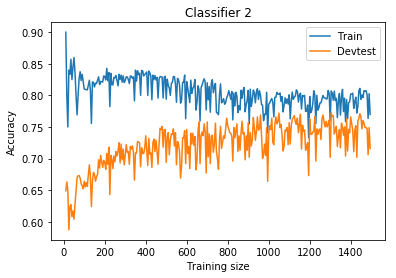

In [14]:
plt.plot(nsamples,train_accuracy_knn,label='Train')
plt.plot(nsamples,devtest_accuracy_knn,label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

### Exercise: Impact of K

The following code plots the accuracy of the classifier for values of K = 1, 2, ... Note that the run may take a few minutes.
1. What is the optimal value of K?
2. From what value of K the results do not change?

In [62]:
train_accuracy_knn = []
devtest_accuracy_knn = []
krange = range(1,20)
for k in krange:
    knn_classifier3 = KNeighborsClassifier(n_neighbors=k)
    knn_classifier3.fit(train_X, train_y)
    
    devtest_predictions = knn_classifier3.predict(devtest_X)
    devtest_accuracy_knn.append(accuracy_score(devtest_y,devtest_predictions))
    
    train_predictions = knn_classifier3.predict(train_X)
    train_accuracy_knn.append(accuracy_score(train_y,train_predictions))

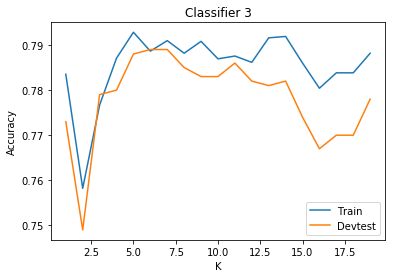

In [63]:
plt.plot(krange,train_accuracy_knn,label='Train')
plt.plot(krange,devtest_accuracy_knn,label='Devtest')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Classifier 3')
plt.legend()